## Import


In [1]:
from methods import Travel
traveler = Travel()

## Show data

In [2]:
# All the dataset
traveler.dataset

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
26563,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
26564,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
26565,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
26566,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159


In [3]:
# Data of all cities of Italy, showing only the city and iso3 columns
traveler.dataset.loc[traveler.dataset['iso3'] == 'ITA', ['city', 'iso3']]

,city,iso3
280,Rome,ITA
536,Milan,ITA
841,Naples,ITA
902,Turin,ITA
1088,Palermo,ITA
...,...,...
19000,Amelia,ITA
19320,Avigliano,ITA
23788,Strongoli,ITA
24534,San Dorligo della Valle,ITA


## Use of methods

In [4]:
#Show the 10 closest cities of Milan
#Sice the code is made for being used with streamlit, we need to get the id of Milan
traveler.dataset.loc[(traveler.dataset['city'] == 'Milan') & (traveler.dataset['iso3'] == 'ITA'), ['id']]

,id
536,1380724377


In [5]:
#Finally find the 10 closest cities
traveler.n_close_city(1380724377,10)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,Distance from start
3855,Monza,Monza,45.5836,9.2736,Italy,IT,ITA,Lombardy,minor,122728.0,1380622727,14.519071
4765,Busto Arsizio,Busto Arsizio,45.6120,8.8518,Italy,IT,ITA,Lombardy,NaN,83314.0,1380033378,30.888743
4750,Como,Como,45.8103,9.0861,Italy,IT,ITA,Lombardy,minor,84378.0,1380994905,39.029441
20748,Chiasso,Chiasso,45.8353,9.0320,Switzerland,CH,CHE,Ticino,NaN,7975.0,1756413890,42.765566
4419,Novara,Novara,45.4500,8.6167,Italy,IT,ITA,Piedmont,minor,104284.0,1380911437,44.753999
3933,Bergamo,Bergamo,45.6950,9.6700,Italy,IT,ITA,Lombardy,minor,119806.0,1380253521,45.152965
17180,Mendrisio,Mendrisio,45.8667,8.9833,Switzerland,CH,CHE,Ticino,NaN,14942.0,1756337416,47.268367
9825,Varese,Varese,45.8167,8.8333,Italy,IT,ITA,Lombardy,minor,80629.0,1380137214,47.768802
4461,Piacenza,Piacenza,45.0500,9.7000,Italy,IT,ITA,Emilia-Romagna,minor,103082.0,1380821832,61.175452


In [6]:
#Show the path considering the 35 closest cities for going from Venice to Palermo
#Due to the fact said before we need to get the id of the cities, starting from Venice
traveler.dataset.loc[(traveler.dataset['city'] == 'Venice') & (traveler.dataset['iso3'] == 'ITA'), ['id']]

,id
2213,1380660414


In [7]:
#And then Palermo
traveler.dataset.loc[(traveler.dataset['city'] == 'Palermo') & (traveler.dataset['iso3'] == 'ITA'), ['id']]

,id
1088,1380428434


In [8]:
#So now we can call the method for showing the path
visit = traveler.distance_between_two_cities(1380660414, 1380428434, 35)

visited = []
for i in range(len(visit)):
    selected_row = traveler.dataset.loc[traveler.dataset['id'] == visit[i], ['city', 'iso3']]
    visited.append(selected_row)

visited

[        city iso3
 2213  Venice  ITA,
          city iso3
 3230  Ravenna  ITA,
          city iso3
 3124  Perugia  ITA,
            city iso3
 17528  Priverno  ITA,
                          city iso3
 5061  Castellammare di Stabia  ITA,
          city iso3
 1088  Palermo  ITA]

In [9]:
#Show the path around the world going only to east starting from London and turning back to London
#Extract the id of London
traveler.dataset.loc[(traveler.dataset['city'] == 'London') & (traveler.dataset['iso3'] == 'GBR'), ['id']]

,id
34,1826645935


In [11]:
#Now we can see the path
east = traveler.east(1826645935)

In [12]:
#Show the time used for the previous travel
#Time from Venice to Palermo 
print('The time needed to travel from Venice to Palermo are:',traveler.time(visit), 'hours')

The time needed to travel from Venice to Palermo are: 20 hours


In [13]:
#Time from London to London going only to east
print('The time needed to travel from London to London going only to east are:',traveler.time(visit), 'hours')

The time needed to travel from London to London going only to east are: 20 hours


## Visualization


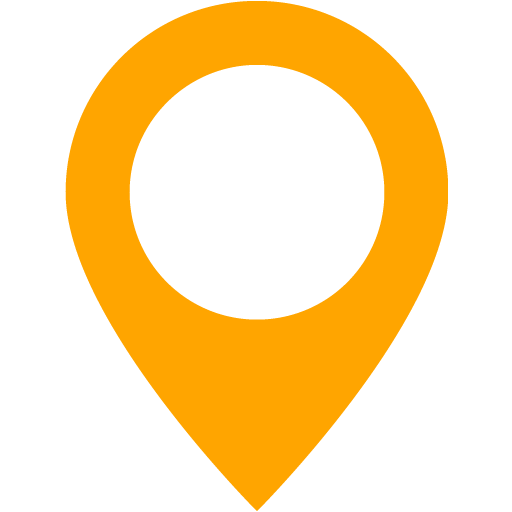
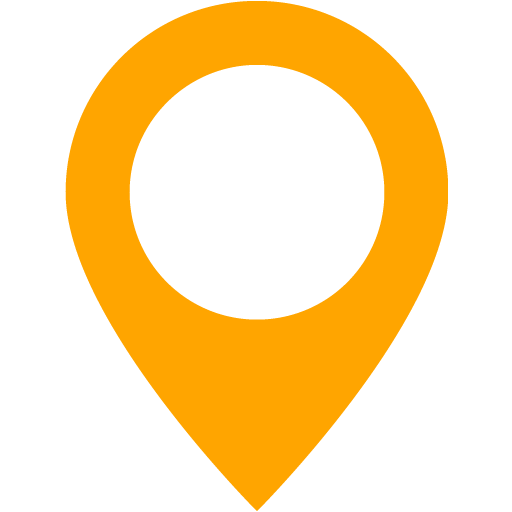
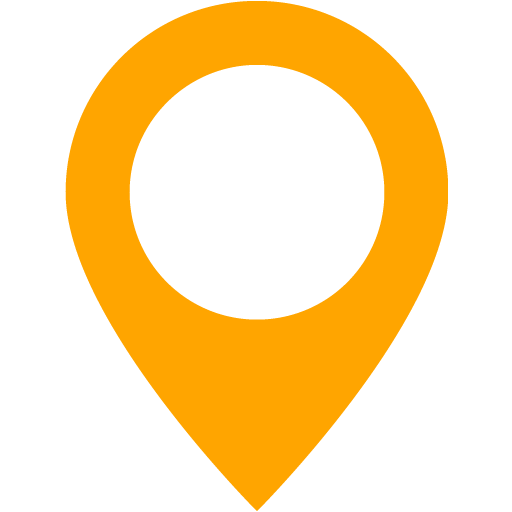
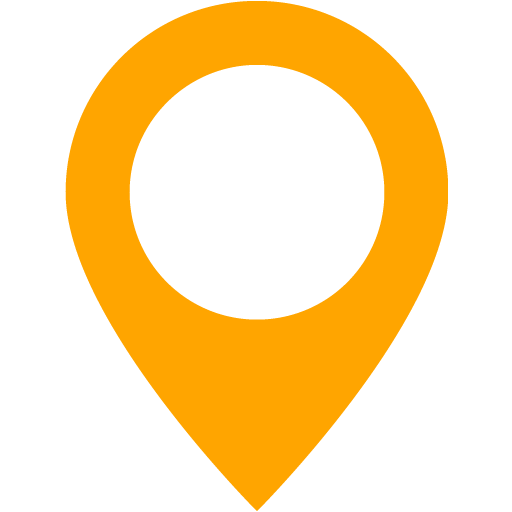
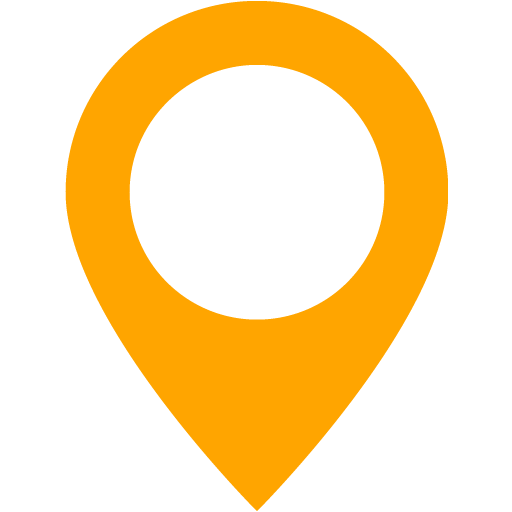
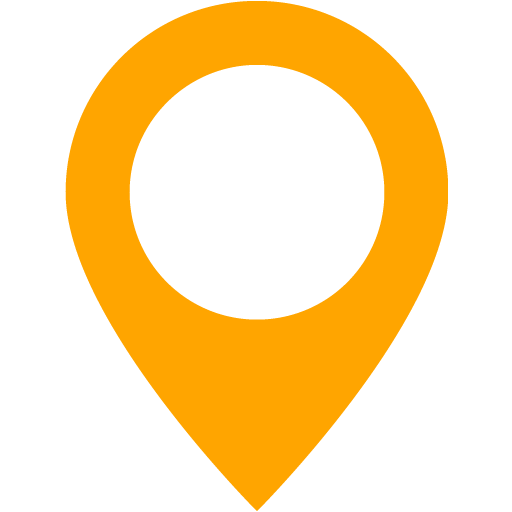

In [14]:
#Visualize the travel from Venice to Palermo
traveler.map_2d(visit)

In [15]:
#Visualize the travel from London to London
traveler.map_3d(east)